# Read Data

In [1]:
# Importing Important Libraries
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd # For  dataframe operation
import numpy as np # For Mathematical computation

In [2]:
#Importing Dataset

Google_stock_train = pd.read_csv("E:/ETLHIVE/Google_Stock_Price_Train.csv")

In [3]:
Google_stock_train.head() # Check data 

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Missing data treatment

In [4]:
Google_stock_train.isnull().sum() # Check missing values
# NO missing data

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
# Get Stock opening Price

In [6]:
tr_df = Google_stock_train[["Open"]].values

# Preprocessing of data

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # MinMaxScaler convert data into range between (0 to 1)
tr_df_scaled = mm.fit_transform(tr_df)

In [8]:
tr_df_scaled.shape

(1258, 1)

# Split data train and test 

# Initialized data into xtrain and ytrain
We want to predict 61st value of stock price.

The first entry in the xtrain would be an array of first 60 open stock price and first entry in ytrain would be 61st value of open stock price.

In [9]:
xtrain = []
ytrain = []
for i in range(60,1258,1):
    xtrain.append(tr_df_scaled[i-60:i])
    ytrain.append(tr_df_scaled[i:i+1,0])

In [10]:
type(xtrain)

list

In [11]:
xtr = np.array(xtrain) # xtrain and ytrain in the from of list using numpy library we convert into array
ytr = np.array(ytrain)

In [12]:
xtr.shape

(1198, 60, 1)

In [13]:
ytr.shape

(1198, 1)

# Create Model - Artificial Neural anetwork with LSTM (Long short term Memory)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [15]:
nn = Sequential()
nn.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50))
nn.add(Dropout(0.2))

nn.add(Dense(units = 1))

In [16]:
nn.compile(optimizer = 'adam', loss = 'mean_squared_error')
nn.fit(xtr,ytr,epochs=100)

Epoch 1/100
38/38 [==============================] - 14s 118ms/step - loss: 0.0511
Epoch 2/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0067
Epoch 9/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0046
Epoch 13/100

In [17]:
ytr_pred = nn.predict(xtr) # Predict results for Xtr for comparison between actual & Predicted stock price. 

In [18]:
ytr_pred

array([[0.08545408],
       [0.08771692],
       [0.08937214],
       ...,
       [0.934043  ],
       [0.9346104 ],
       [0.93341935]], dtype=float32)

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytr,ytr_pred) # Checking loss between actual & predicted values.

0.017301988659763658

In [20]:
Prediction_compare = pd.DataFrame(mm.inverse_transform(ytr)) # Converted data into Original form 

In [21]:
Prediction_compare["Y_Prdicted"] = pd.DataFrame(mm.inverse_transform(ytr_pred))

In [22]:
Prediction_compare.columns = ["Y_Actual","Y_Prdicted"] # Made two columns for data analysis of numeric values.

In [23]:
Prediction_compare # Predicted Google stock open Price

,Y_Actual,Y_Prdicted
0,325.50,325.056671
1,324.66,326.273132
2,319.19,327.162903
3,321.50,327.243866
4,318.03,326.652161
...,...,...
1193,790.90,782.436707
1194,790.68,781.723511
1195,793.70,781.224182
1196,783.33,781.529175


# Read test data

In [24]:
Google_stock_test = pd.read_csv("E:/ETLHIVE/Google_Stock_Price_Test.csv")
Google_stock_test.head()
Real_Google_stock_test = Google_stock_test[["Open"]]

In [25]:
# Check missing values in test data

In [26]:
Google_stock_test.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [27]:
Google_stock_test.shape

(20, 6)

In [28]:
ts_df = pd.concat([Google_stock_train,Google_stock_test])
ts_df.index = range(0,1278)

In [29]:
ts_df.shape

(1278, 6)

In [30]:
ts_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1273,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
1274,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
1275,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
1276,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


In [31]:
ts_df = ts_df[["Open"]].values

In [32]:
ts_df

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [834.71],
       [814.66],
       [796.86]])

# Use MinMaxScaler to scale our test data between 0 and 1

In [33]:
ts_df_scaled = mm.fit_transform(ts_df)

In [34]:
ts_df_scaled.shape

(1278, 1)

In [35]:
# Initialized data into xtest

In [36]:
xtest = []
for i in range(1258,1278,1):
    xtest.append(ts_df_scaled[i-60:i])

In [37]:
xtest

[array([[0.8947359 ],
        [0.89591723],
        [0.89242693],
        [0.90844654],
        [0.90325583],
        [0.89870948],
        [0.89947914],
        [0.89616782],
        [0.91057653],
        [0.9291736 ],
        [0.9382305 ],
        [0.92337432],
        [0.94109435],
        [0.96217938],
        [0.9436718 ],
        [0.93411373],
        [0.94726951],
        [0.92421558],
        [0.90169862],
        [0.89330398],
        [0.87370456],
        [0.8440101 ],
        [0.88668134],
        [0.90261147],
        [0.89641841],
        [0.916519  ],
        [0.85453472],
        [0.85285221],
        [0.83740536],
        [0.85213625],
        [0.87311389],
        [0.88107895],
        [0.86539942],
        [0.88333423],
        [0.87456371],
        [0.86835275],
        [0.86072777],
        [0.88136534],
        [0.87875208],
        [0.85614563],
        [0.83314539],
        [0.8566289 ],
        [0.86919401],
        [0.86251768],
        [0.88306574],
        [0

In [38]:
xts = np.array(xtest) #xtest in the from of list using numpy library we convert into array

In [39]:
xts

array([[[0.8947359 ],
        [0.89591723],
        [0.89242693],
        ...,
        [0.92104745],
        [0.90248617],
        [0.90144803]],

       [[0.89591723],
        [0.89242693],
        [0.90844654],
        ...,
        [0.90248617],
        [0.90144803],
        [0.89439582]],

       [[0.89242693],
        [0.90844654],
        [0.90325583],
        ...,
        [0.90144803],
        [0.89439582],
        [0.91148938]],

       ...,

       [[0.92421558],
        [0.90169862],
        [0.89330398],
        ...,
        [0.97223863],
        [0.98534071],
        [1.        ]],

       [[0.90169862],
        [0.89330398],
        [0.87370456],
        ...,
        [0.98534071],
        [1.        ],
        [0.99445131]],

       [[0.89330398],
        [0.87370456],
        [0.8440101 ],
        ...,
        [1.        ],
        [0.99445131],
        [0.95856378]]])

In [40]:
test_predication = nn.predict(xts)

In [41]:
# Make Predication Using Model

In [42]:
L = pd.DataFrame(mm.inverse_transform(test_predication))

In [43]:
Google_stock_test["Test_Pred"] = L

In [44]:
Google_stock_test

,Date,Open,High,Low,Close,Volume,Test_Pred
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300",780.909180
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000",778.654419
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200",777.843018
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200",778.279175
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400",780.615906
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800",785.436951
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900",791.099609
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100",795.223511
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200",797.389832
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100",798.000977


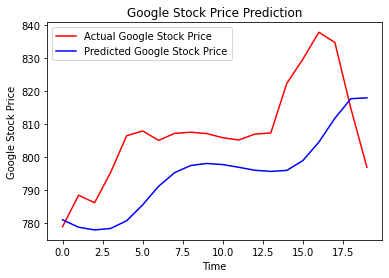

In [45]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(Real_Google_stock_test, color = 'red', label = 'Actual Google Stock Price')
plt.plot(L, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()